ЗАВДАННЯ 3.
Розробити згорткову нейронну мережу для розпізнавання зображень датасету
cifar_10. Підібрати оптимальну кількість шарів, функції активації, кількіть
епох навчання, розмір bath_size. Навчити модель. Розрахувати функцію втрат
і точності. Побудувати відповідні графіки. Візуалізувати результати. Зробити
висновки.
Зверніть увагу, що згорткова модель довго навчається, тому краще брати
кількість епох до 10.

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

1. Завантаження та підготовка даних. Далі, нормалізація значень пікселів до діапазону [0, 1]

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

2. Створення згорткової нейронної мережі

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

3. Компіляція моделі

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4. Виведення структури моделі


In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

5. Навчання моделі

In [41]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 69s 88ms/step - loss: 1.6219 - accuracy: 0.4049 - val_loss: 1.3254 - val_accuracy: 0.5175
Epoch 2/10
782/782 [==============================] - 65s 83ms/step - loss: 1.2723 - accuracy: 0.5448 - val_loss: 1.1724 - val_accuracy: 0.5849
Epoch 3/10
782/782 [==============================] - 67s 86ms/step - loss: 1.1085 - accuracy: 0.6078 - val_loss: 1.1122 - val_accuracy: 0.5987
Epoch 4/10
782/782 [==============================] - 67s 86ms/step - loss: 1.0060 - accuracy: 0.6472 - val_loss: 1.0171 - val_accuracy: 0.6390
Epoch 5/10
782/782 [==============================] - 67s 86ms/step - loss: 0.9373 - accuracy: 0.6722 - val_loss: 0.9466 - val_accuracy: 0.6706
Epoch 6/10
782/782 [==============================] - 67s 86ms/step - loss: 0.8776 - accuracy: 0.6927 - val_loss: 0.9238 - val_accuracy: 0.6774
Epoch 7/10
782/782 [==============================] - 68s 86ms/step - loss: 0.8241 - accuracy: 0.7108 - val_loss: 0.8986 - val_accuracy:

6. Оцінка моделі на тестовому наборі


In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Тестовий набір: {test_acc}')

313/313 [==============================] - 5s 15ms/step - loss: 0.8581 - accuracy: 0.7008
Тестовий набір: 0.7008000016212463


7. Візуалізація результатів.

In [43]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

8. Графік точності


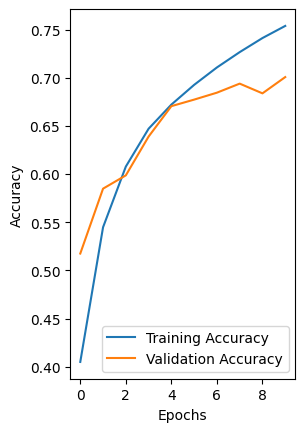

In [45]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

9. Графік функції втрат


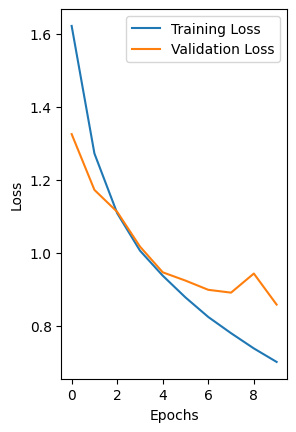

In [46]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

ВИСНОВОК. Отже, розроблено згорткову нейронну мережу для розпізнавання зображень датасету cifar_10. Також, у ході виконання я підібрала оптимальну кількість шарів, функції активації, кількіть епох навчання, розмір bath_size та навчила модель, розрахованофункцію втрат і точності.
Для візуалізування результатів побудувано відповідні графіки.Кількість епох = 10.
За графіками функції точності видно, що вони розташовуються у зростаючому порядку.
А графіки фукції втрат - у спадаючому.
Отже,згорткова нейронна мережа навчена та функціонує вірно.